In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [21]:
right = pd.read_csv('40cm-tey1-pilot_test/3-right_leg_tibi_20250429_191431_894.csv', skiprows=10, sep=",")
left = pd.read_csv('40cm-tey1-pilot_test/2-left_leg_tibia_20250429_191431_893.csv', skiprows=10, sep=",")
pelvis = pd.read_csv('40cm-tey1-pilot_test/1-pelvis(s2)_20250429_191431_886.csv', skiprows=10, sep=",")

In [22]:
time = right['SampleTimeFine']-right['SampleTimeFine'].iloc[0]
right['Tim-se']= time*1e-6
right['Tim_dt'] = right['Tim-se'].diff()
right['a_z'] = right['dv[3]'] / right['Tim_dt']

left['Tim-se'] = time * 1e-6
left['Tim_dt'] = left['Tim-se'].diff()
left['a_z'] = left['dv[3]'] / left['Tim_dt']

# For left dataframe

pelvis['Tim-se'] = time* 1e-6
pelvis['Tim_dt'] = pelvis['Tim-se'].diff()
pelvis['a_z'] = pelvis['dv[3]'] / pelvis['Tim_dt']

In [23]:
left['a_z'].describe()

count    490.000000
mean      -0.685228
std       10.575108
min     -117.409432
25%       -0.694171
50%       -0.323634
75%        1.056084
max      117.928541
Name: a_z, dtype: float64

In [24]:
right['a_z'].describe()

count    490.000000
mean      -1.667427
std        5.630226
min      -86.804404
25%       -1.254275
50%       -1.050729
75%       -0.742980
max       41.537949
Name: a_z, dtype: float64

In [25]:
pelvis['a_z'].describe()

count    489.000000
mean       2.175384
std        3.309963
min       -5.151497
25%        1.011220
50%        1.245395
75%        1.551389
max       27.602688
Name: a_z, dtype: float64

<Axes: title={'center': 'Pelvis Acc Z vs Time'}, xlabel='Tim-se'>

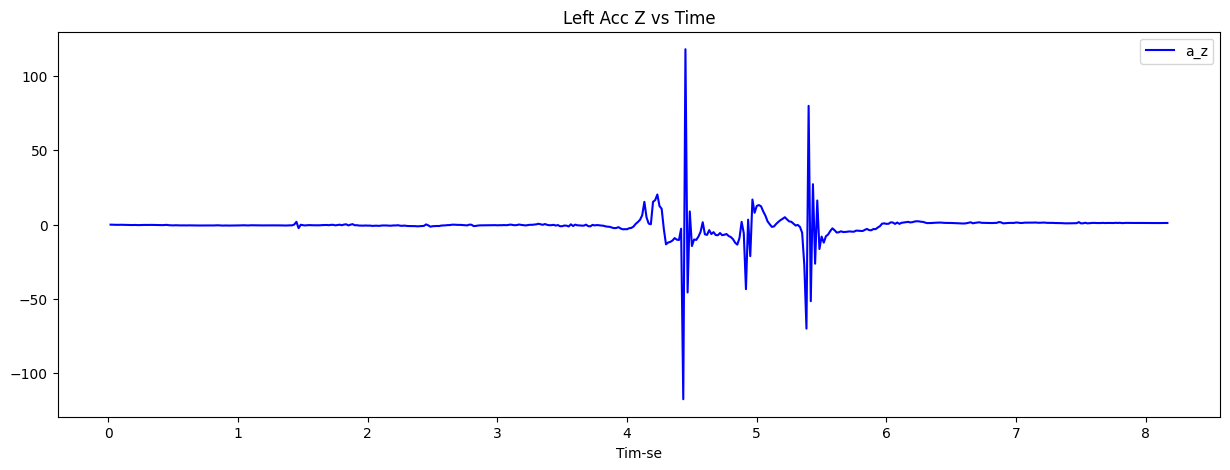

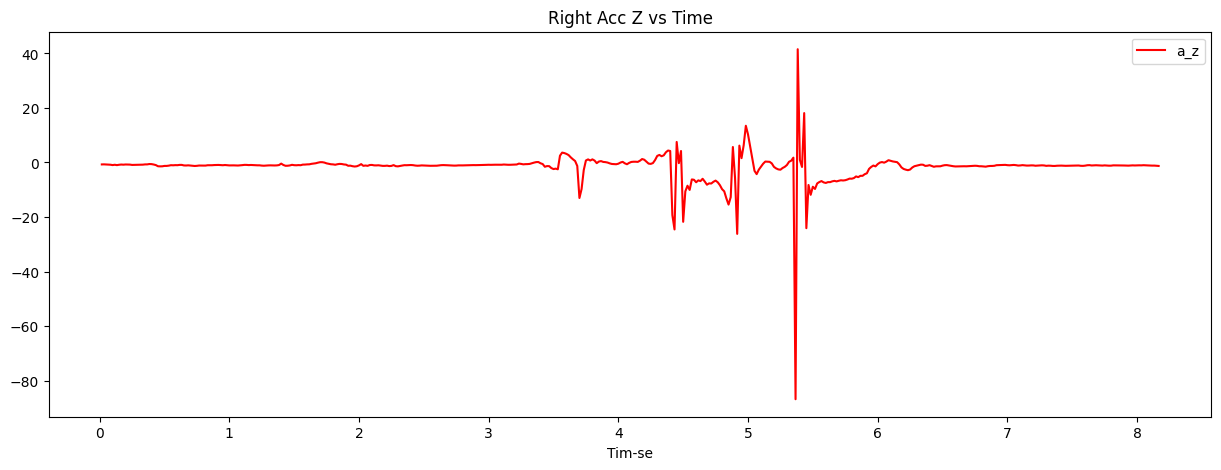

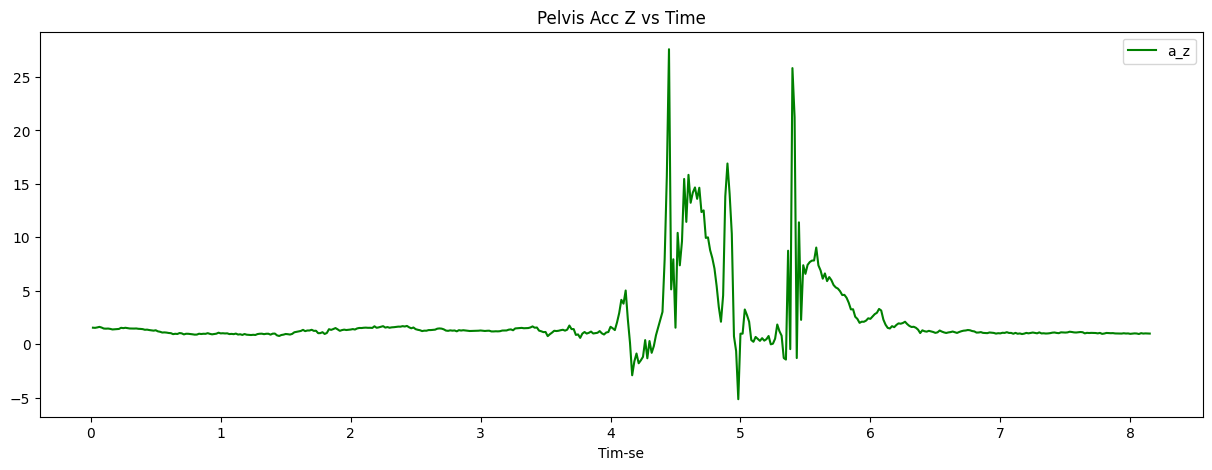

In [26]:
# Visualize the data and find the connection between the accelerometer and ties
left.plot(x='Tim-se', y='a_z', title='Left Acc Z vs Time', figsize=(15, 5), color='blue')
right.plot(x='Tim-se', y='a_z', title='Right Acc Z vs Time', figsize=(15, 5), color='red')
pelvis.plot(x='Tim-se', y='a_z', title='Pelvis Acc Z vs Time', figsize=(15, 5), color='green')
